<a href="https://colab.research.google.com/github/Suuunboy/ML/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.2.1+cu121'

In [ ]:
#agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

In [ ]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [ ]:
def plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #linear regression formula

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

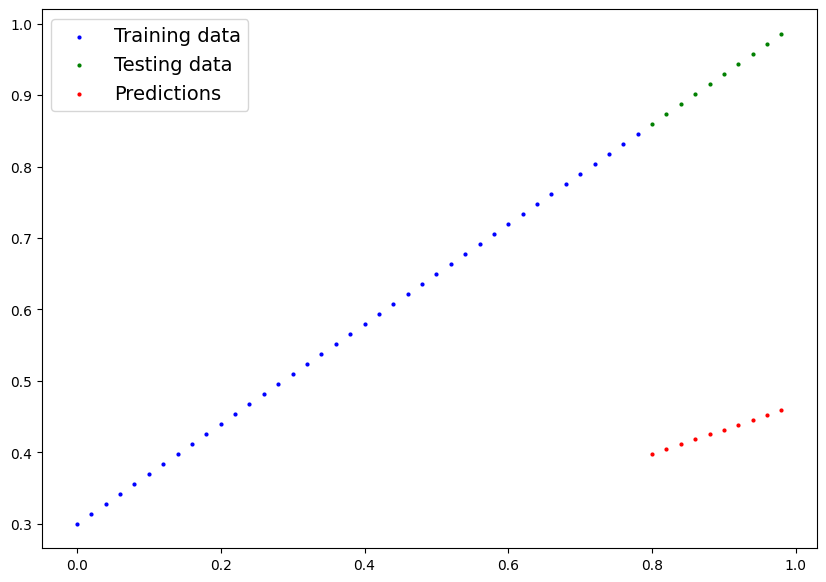

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#loss function
loss_fn = nn.L1Loss()

#optimizer стохастический градиентный спуск
optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01)

In [ ]:
epochs = 100

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:

            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

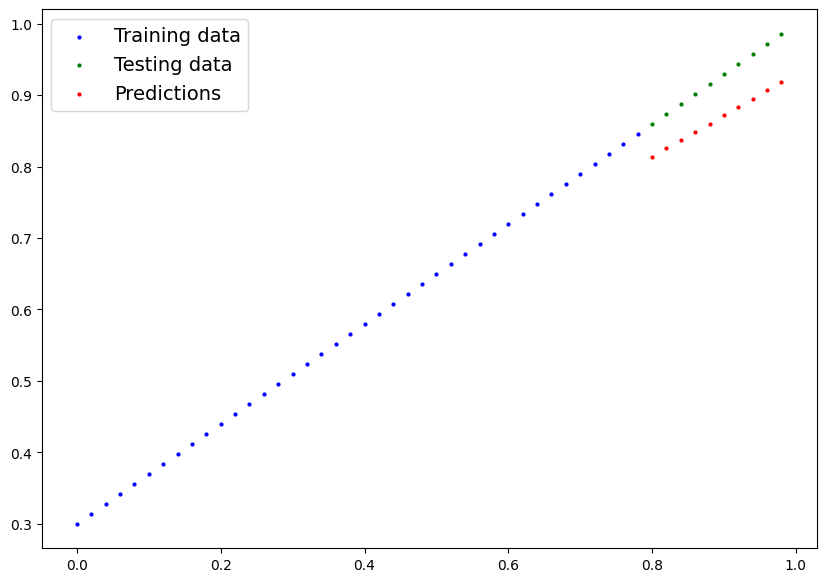

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
from pathlib import Path

In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

# Putting all together


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.2.1+cu121'

In [ ]:
#agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
# y = weight * X + bias

weight = 0.4
bias = 0.1

start = 0
end = 1
step = 0.02

#create x and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1080],
         [0.1160],
         [0.1240],
         [0.1320],
         [0.1400],
         [0.1480],
         [0.1560],
         [0.1640],
         [0.1720]]))

In [ ]:
#split the data to test and train values

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)

(40, 10)

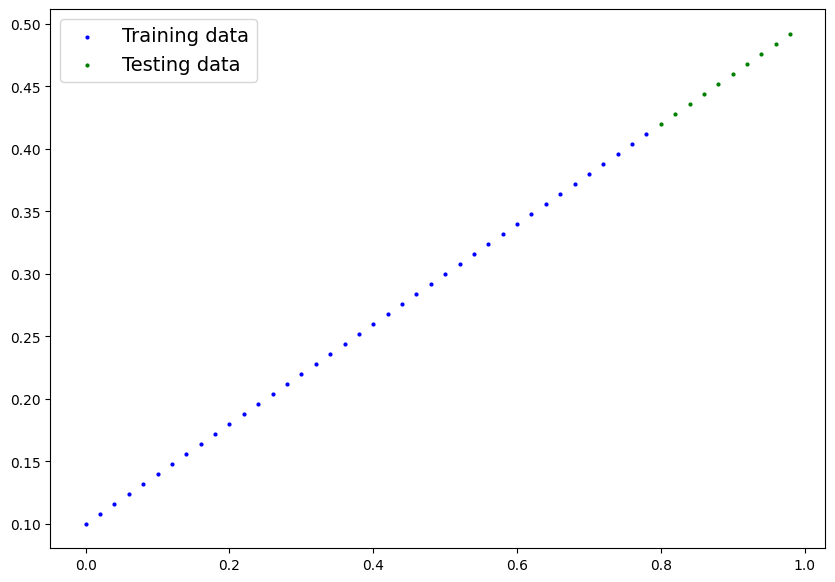

In [ ]:
#plot_predictions defined upper

plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
#building a linear model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features= 1, out_features = 1)

  def forward(self, x):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
model_1.to(device)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(epoch, 'Loss', loss, 'Test-loss', test_loss)

0 Loss tensor(0.8722, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(1.0410, device='cuda:0')
10 Loss tensor(0.7570, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.9063, device='cuda:0')
20 Loss tensor(0.6418, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.7716, device='cuda:0')
30 Loss tensor(0.5265, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.6368, device='cuda:0')
40 Loss tensor(0.4113, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.5021, device='cuda:0')
50 Loss tensor(0.2961, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.3674, device='cuda:0')
60 Loss tensor(0.1809, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.2327, device='cuda:0')
70 Loss tensor(0.0657, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.0980, device='cuda:0')
80 Loss tensor(0.0120, device='cuda:0', grad_fn=<MeanBackward0>) Test-loss tensor(0.0274, device='cuda:0')
90 Loss tensor(0.0085, device='cuda:0'

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4005]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0915], device='cuda:0'))])

In [ ]:
weight, bias

(0.4, 0.1)

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU


tensor([[0.4119],
        [0.4199],
        [0.4279],
        [0.4359],
        [0.4440],
        [0.4520],
        [0.4600],
        [0.4680],
        [0.4760],
        [0.4840]], device='cuda:0')

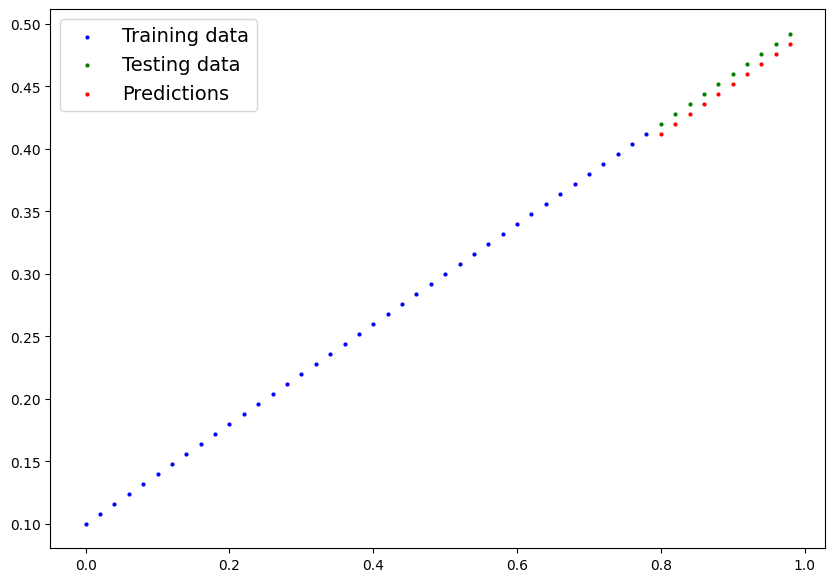

In [ ]:
# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())